In [1]:
%load_ext autoreload
%autoreload 2

from diffusers import StableDiffusionGLIGENPipeline

In [2]:
from transformers import CLIPTextModel, CLIPTokenizer

import diffusers
from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    EulerDiscreteScheduler,
    UNet2DConditionModel,
)


# pretrained_model_name_or_path = 'masterful/gligen-1-4-generation-text-box'

pretrained_model_name_or_path = "stabilityai/stable-diffusion-2-1-base"
#pretrained_model_name_or_path = "/root/data/zhizhonghuang/checkpoints/models--masterful--gligen-1-4-generation-text-box/snapshots/d2820dc1e9ba6ca082051ce79cfd3eb468ae2c83"

tokenizer = CLIPTokenizer.from_pretrained(pretrained_model_name_or_path, subfolder="tokenizer")
noise_scheduler = DDPMScheduler.from_pretrained(pretrained_model_name_or_path, subfolder="scheduler")
text_encoder = CLIPTextModel.from_pretrained(pretrained_model_name_or_path, subfolder="text_encoder")
vae = AutoencoderKL.from_pretrained(pretrained_model_name_or_path, subfolder="vae")
# unet = UNet2DConditionModel.from_pretrained(
#     pretrained_model_name_or_path, subfolder="unet"
# )

noise_scheduler = EulerDiscreteScheduler.from_config(noise_scheduler.config)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

In [3]:
#unet = UNet2DConditionModel.from_pretrained(pretrained_model_name_or_path, subfolder="unet")

In [21]:

from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    torch_dtype=torch.float16
).to("cuda")

image = pipe("the frame of a little rabbit in black and white as a drawable picture for kids").images[0]
image.save("bild.png")
image.show()



#pipe = StableDiffusionGLIGENPipeline(
#    vae,
#   text_encoder,
#    tokenizer,
#    unet,
#    noise_scheduler,
 #   safety_checker=None,
 #   feature_extractor=None,
#)
#pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

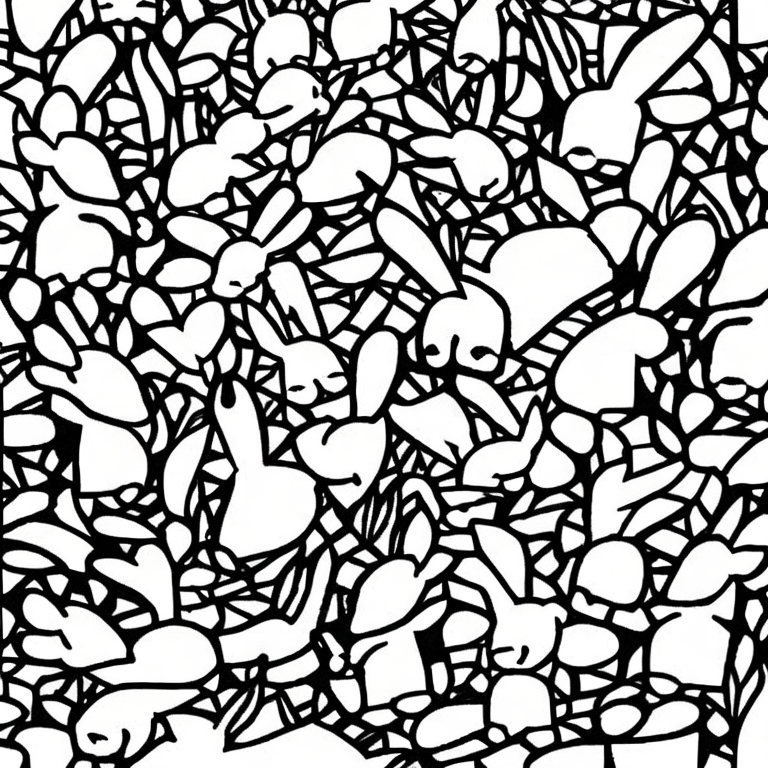

In [22]:
from IPython.display import display
display(image)
# @title





# Neuer Abschnitt
    zip_ref.extractall("/content/Hase")

# Neuer Abschnitt

# Neuer Abschnitt

In [30]:
import zipfile
with zipfile.ZipFile("Hase.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/Hase")

In [8]:

!pip install bitsandbytes

pretrained_model_name_or_path = "stabilityai/stable-diffusion-2-1-base"
instance_data_dir = "/content/Hase/Hase"
output_dir = "/content/lora-my-style"
instance_prompt = "a rabbit in black and white as a drawable picture for kids"  # z. B. "a painting in the style of xyz"

resolution = 512
train_batch_size = 1
num_train_epochs = 10  # 20–30 = stärkerer Stil
checkpointing_steps = 500

!accelerate launch examples/dreambooth/train_dreambooth_lora.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-2-1" \
  --instance_data_dir="/content/Hase/Hase" \
  --output_dir="/content/lora-hase" \
  --instance_prompt="a rabbit as a black-and-white line drawing for kids" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=1e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_train_epochs=10 \
  --checkpointing_steps=500 \
  --seed=1337 \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --enable_xformers_memory_efficient_attention \


ipex flag is deprecated, will be removed in Accelerate v1.10. From 2.7.0, PyTorch has all needed optimizations for Intel CPU and XPU.
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-06-28 10:26:54.377859: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751106414.397374   27104 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751106414.403269   27104 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attemp

pretrained_model_name_or_path = "stabilityai/stable-diffusion-2-1"
instance_data_dir = "/content/my-style"
output_dir = "/content/lora-my-style"
instance_prompt = "a photo of xyz style"  # z. B. "a painting in the style of xyz"

resolution = 512
train_batch_size = 1
num_train_epochs = 10  # 20–30 = stärkerer Stil
checkpointing_steps = 500

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


  0%|          | 0/30 [00:00<?, ?it/s]

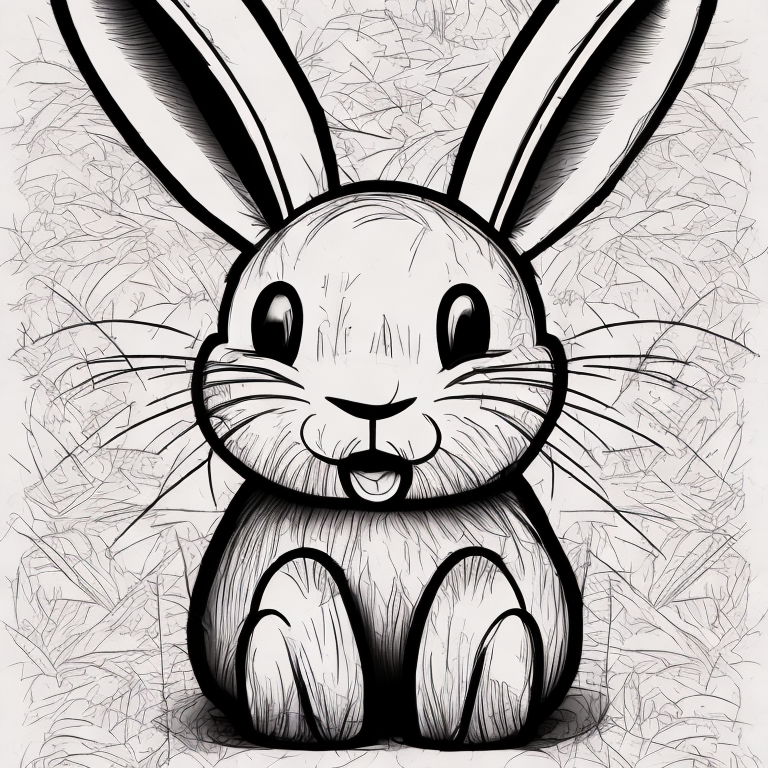

In [20]:
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display

# Basis-Modell laden
pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    torch_dtype=torch.float16
).to("cuda")

# LoRA-Gewichte laden
pipe.load_lora_weights("/content/lora-hase")

# Bild generieren
prompt = "a cartoon bunny with a hat at the head in black and white as a drawable picture for kids, very light background, no gray"
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0]

# Anzeigen

display(image)
# @title


In [19]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/lora-hase /content/drive/MyDrive/

Mounted at /content/drive


In [ ]:
import numpy as np


# prompt = 'A realistic image of landscape scene depicting a green car parking on the left of a blue truck, with a red air balloon and a bird in the sky'
# gen_boxes = [('a green car', [21, 281, 211, 159]), ('a blue truck', [269, 283, 209, 160]), ('a red air balloon', [66, 8, 145, 135]), ('a bird', [296, 42, 143, 100])]

# prompt = 'A realistic top-down view of a wooden table with two apples on it'
# gen_boxes = [('a wooden table', [20, 148, 472, 216]), ('an apple', [150, 226, 100, 100]), ('an apple', [280, 226, 100, 100])]

# prompt = 'A realistic scene of three skiers standing in a line on the snow near a palm tree'
# gen_boxes = [('a skier', [5, 152, 139, 168]), ('a skier', [278, 192, 121, 158]), ('a skier', [148, 173, 124, 155]), ('a palm tree', [404, 105, 103, 251])]

prompt = "An oil painting of a pink dolphin jumping on the left of a steam boat on the sea"
gen_boxes = [("a steam boat", [232, 225, 257, 149]), ("a jumping pink dolphin", [21, 249, 189, 123])]

boxes = np.array([x[1] for x in gen_boxes])
boxes = boxes / 512
boxes[:, 2] = boxes[:, 0] + boxes[:, 2]
boxes[:, 3] = boxes[:, 1] + boxes[:, 3]
boxes = boxes.tolist()
gligen_phrases = [x[0] for x in gen_boxes]

In [ ]:
images = pipe(
    prompt=prompt,
    gligen_phrases=gligen_phrases,
    gligen_boxes=boxes,
    gligen_scheduled_sampling_beta=1.0,
    output_type="pil",
    num_inference_steps=50,
    negative_prompt="artifacts, blurry, smooth texture, bad quality, distortions, unrealistic, distorted image, bad proportions, duplicate",
    num_images_per_prompt=16,
).images

In [ ]:
diffusers.utils.make_image_grid(images, 4, len(images) // 4)